## Análise e diagnóstico

Nesse notebook são feitas algumas análises para o diagnóstico dos dados da API do Olho Vivo

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import random
from utils.load_csv import load_csv

In [2]:
#consumo_diesel = load_csv('consumo_diesel.csv')

df_posicoes = load_csv('df_posicoes.csv')

gdf_final = load_csv('gdf_final.csv')

Ônibus que operam em mais de uma linha

In [3]:
gdf_final

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2
0,68853,5010-10,False,148.349719,"[332687.68579879985, 7383667.184539581]","[np.float64(332792.2284083655), np.float64(738...",2025-10-02 12:48:43-03:00,2025-10-02 12:49:30-03:00,Articulado (18m),0.80,3.281178,9.989606
1,68853,5010-10,False,32.385046,"[332792.2284083655, 7383772.438907389]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:49:30-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),0.80,0.716288,2.180751
2,68853,5010-10,False,0.000000,"[332804.84353484295, 7383802.265905192]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:50:12-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),0.80,0.000000,0.000000
3,68853,5010-10,False,87.364702,"[332804.84353484295, 7383802.265905192]","[np.float64(332744.1297509116), np.float64(738...",2025-10-02 12:50:12-03:00,2025-10-02 12:51:22-03:00,Articulado (18m),0.80,1.932320,5.882984
4,68853,5010-10,False,51.326566,"[332744.1297509116, 7383865.086503765]","[np.float64(332692.8276940262), np.float64(738...",2025-10-02 12:51:22-03:00,2025-10-02 12:51:41-03:00,Articulado (18m),0.80,1.135234,3.456240
...,...,...,...,...,...,...,...,...,...,...,...,...
139714,73205,6014-10,False,0.000000,"[317105.7824061066, 7373509.694308272]","[np.float64(317105.7824061066), np.float64(737...",2025-10-02 12:55:50-03:00,2025-10-02 12:55:50-03:00,Midiônibus,0.47,0.000000,0.000000
139715,48005,407G-10,False,252.540939,"[352769.53811401135, 7389163.07991912]","[np.float64(353021.55868181016), np.float64(73...",2025-10-02 12:55:35-03:00,2025-10-02 12:56:20-03:00,Articulado (23m),0.85,4.624159,13.149026
139716,61310,6960-10,False,0.000000,"[325377.1291750581, 7382996.118304582]","[np.float64(325377.1291750581), np.float64(738...",2025-10-02 12:55:37-03:00,2025-10-02 12:56:21-03:00,Miniônibus,0.35,0.000000,0.000000
139717,61322,5370-10,False,0.000000,"[325117.0786599126, 7370478.8199460115]","[np.float64(325117.0786599126), np.float64(737...",2025-10-02 12:55:29-03:00,2025-10-02 12:56:14-03:00,Miniônibus,0.35,0.000000,0.000000


In [4]:
gdf_final['id_2'] = gdf_final['linha'] + '_' + gdf_final['id_onibus'].astype(str)

gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,id_2
0,68853,5010-10,False,148.349719,"[332687.68579879985, 7383667.184539581]","[np.float64(332792.2284083655), np.float64(738...",2025-10-02 12:48:43-03:00,2025-10-02 12:49:30-03:00,Articulado (18m),0.8,3.281178,9.989606,5010-10_68853
1,68853,5010-10,False,32.385046,"[332792.2284083655, 7383772.438907389]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:49:30-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),0.8,0.716288,2.180751,5010-10_68853
2,68853,5010-10,False,0.000000,"[332804.84353484295, 7383802.265905192]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:50:12-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),0.8,0.000000,0.000000,5010-10_68853
3,68853,5010-10,False,87.364702,"[332804.84353484295, 7383802.265905192]","[np.float64(332744.1297509116), np.float64(738...",2025-10-02 12:50:12-03:00,2025-10-02 12:51:22-03:00,Articulado (18m),0.8,1.932320,5.882984,5010-10_68853
4,68853,5010-10,False,51.326566,"[332744.1297509116, 7383865.086503765]","[np.float64(332692.8276940262), np.float64(738...",2025-10-02 12:51:22-03:00,2025-10-02 12:51:41-03:00,Articulado (18m),0.8,1.135234,3.456240,5010-10_68853


In [5]:
gdf_final['id_onibus'].nunique()

10090

In [6]:
gdf_final['id_2'].nunique()

10095

In [7]:
df = gdf_final.groupby('id_onibus')['linha'].nunique() > 1

ids_multilinhas = gdf_final[gdf_final['id_onibus'].isin(df[df].index)]

ids_multilinhas[['id_onibus', 'linha']].drop_duplicates().sort_values('id_onibus')

,id_onibus,linha
45786,3117,414P-10
45785,3117,4027-41
122618,52706,5103-10
122612,52706,5107-10
9667,90999,5032-10
9658,90999,514T-10
9655,90999,3778-10
9654,90999,2722-10


In [8]:
counts = gdf_final.groupby('id_onibus')['linha'].nunique()

ids_multilinhas = counts[counts > 1].index

ids_multilinhas

Index([3117, 52706, 90999], dtype='int64', name='id_onibus')

Ônibus duplicados

In [9]:
#duplicados = (df_posicoes.groupby(["id_onibus", "timestamp"]).filter(lambda x: len(x) > 1).sort_values(["id_onibus", "timestamp"]))

#duplicados

Horas e datas das posições

In [10]:
df_posicoes['timestamp'] = pd.to_datetime(df_posicoes['timestamp'])

In [11]:
horas = df_posicoes["timestamp"].dt.hour

horas_unicas = horas.unique()
horas_unicas.sort()

print(horas_unicas)

[ 9 10 11 12]


In [12]:
dez_horas = df_posicoes[df_posicoes["timestamp"].dt.hour == 10]

dez_horas

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo
51132,2705-10,36022,2025-10-02 10:08:52-03:00,-23.547345,-46.392863,False,Padron
61131,2705-10,36022,2025-10-02 10:16:58-03:00,-23.545614,-46.393119,False,Padron
78718,2705-10,36022,2025-10-02 10:25:59-03:00,-23.545614,-46.393119,False,Padron
88768,2705-10,36022,2025-10-02 10:31:46-03:00,-23.544820,-46.402256,False,Padron


In [13]:
datas = df_posicoes["timestamp"].dt.date

datas_unicas = datas.unique()
datas_unicas.sort()

print(datas_unicas)

[datetime.date(2025, 10, 2)]


Distâncias e velocidades impossíveis

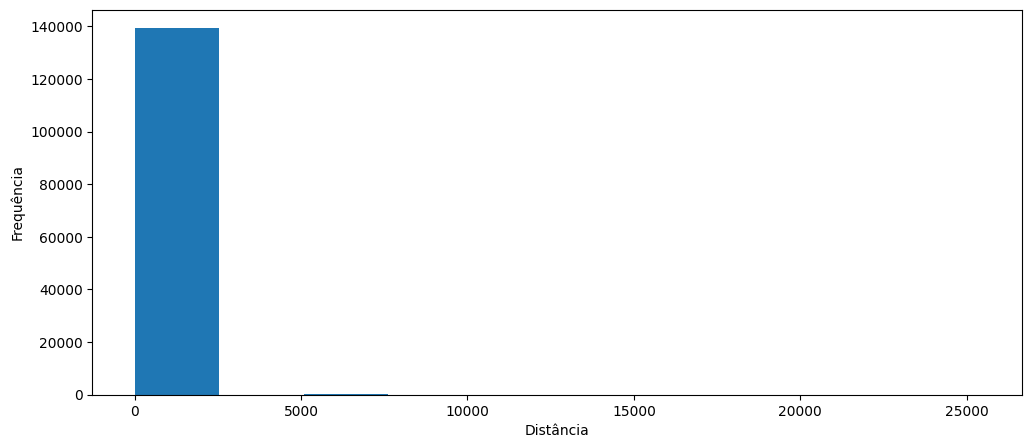

In [14]:
plt.figure(figsize=(12,5))
plt.hist(gdf_final["distancia_percorrida"])
plt.xlabel("Distância")
plt.ylabel("Frequência")
plt.show()

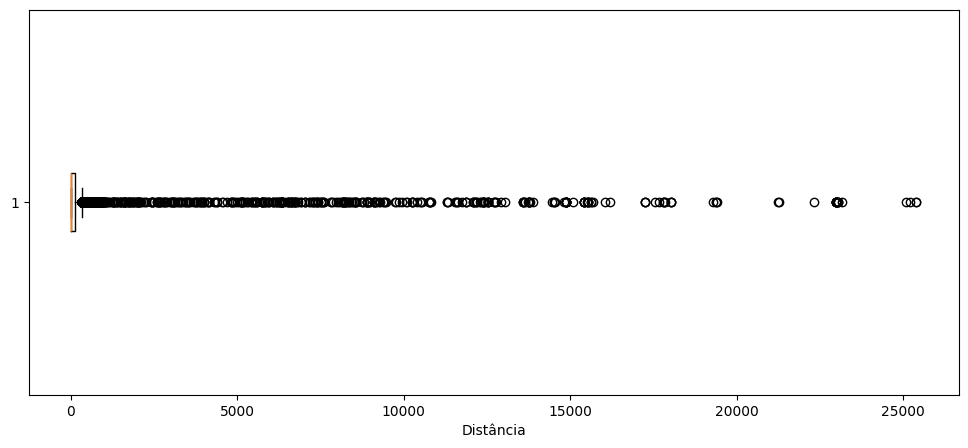

In [15]:
plt.figure(figsize=(12,5))
plt.boxplot(gdf_final["distancia_percorrida"], vert=False)
plt.xlabel("Distância")
plt.show()

In [16]:
gdf_final[gdf_final['distancia_percorrida'] >= 25000]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,id_2
26482,61376,6913-10,False,25391.101100,"[325114.5530892765, 7370451.597748772]","[np.float64(332590.96723905264), np.float64(73...",2025-10-02 12:50:48-03:00,2025-10-02 12:51:32-03:00,Padron,0.63,785.374424,812.461360,6913-10_61376
26483,61376,6913-10,False,25402.607054,"[332590.96723905264, 7394717.03091016]","[np.float64(325040.97635947505), np.float64(73...",2025-10-02 12:51:32-03:00,2025-10-02 12:52:17-03:00,Padron,0.63,785.730315,812.829526,6913-10_61376
115776,61813,5370-10,False,25078.944277,"[332958.2949858491, 7394300.423010439]","[np.float64(325117.0786599126), np.float64(737...",2025-10-02 12:50:19-03:00,2025-10-02 12:50:45-03:00,Miniônibus,0.35,391.953443,452.411168,5370-10_61813
115782,61813,5370-10,False,25225.010680,"[325117.0786599126, 7370478.8199460115]","[np.float64(332865.93880648626), np.float64(73...",2025-10-02 12:53:24-03:00,2025-10-02 12:53:52-03:00,Miniônibus,0.35,394.236284,455.046131,5370-10_61813


In [17]:
gdf_final['momento_inicial'] = pd.to_datetime(gdf_final['momento_inicial'])
gdf_final['momento_final'] = pd.to_datetime(gdf_final['momento_final'])

In [18]:
gdf_final['duracao'] = (gdf_final['momento_final'] - gdf_final['momento_inicial']).dt.total_seconds()

gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,id_2,duracao
0,68853,5010-10,False,148.349719,"[332687.68579879985, 7383667.184539581]","[np.float64(332792.2284083655), np.float64(738...",2025-10-02 12:48:43-03:00,2025-10-02 12:49:30-03:00,Articulado (18m),0.8,3.281178,9.989606,5010-10_68853,47.0
1,68853,5010-10,False,32.385046,"[332792.2284083655, 7383772.438907389]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:49:30-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),0.8,0.716288,2.180751,5010-10_68853,42.0
2,68853,5010-10,False,0.000000,"[332804.84353484295, 7383802.265905192]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:50:12-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),0.8,0.000000,0.000000,5010-10_68853,0.0
3,68853,5010-10,False,87.364702,"[332804.84353484295, 7383802.265905192]","[np.float64(332744.1297509116), np.float64(738...",2025-10-02 12:50:12-03:00,2025-10-02 12:51:22-03:00,Articulado (18m),0.8,1.932320,5.882984,5010-10_68853,70.0
4,68853,5010-10,False,51.326566,"[332744.1297509116, 7383865.086503765]","[np.float64(332692.8276940262), np.float64(738...",2025-10-02 12:51:22-03:00,2025-10-02 12:51:41-03:00,Articulado (18m),0.8,1.135234,3.456240,5010-10_68853,19.0


In [19]:
gdf_final["velocidade"] = (gdf_final["distancia_percorrida"] / gdf_final["duracao"]) * 3.6

gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,id_2,duracao,velocidade
0,68853,5010-10,False,148.349719,"[332687.68579879985, 7383667.184539581]","[np.float64(332792.2284083655), np.float64(738...",2025-10-02 12:48:43-03:00,2025-10-02 12:49:30-03:00,Articulado (18m),0.8,3.281178,9.989606,5010-10_68853,47.0,11.362957
1,68853,5010-10,False,32.385046,"[332792.2284083655, 7383772.438907389]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:49:30-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),0.8,0.716288,2.180751,5010-10_68853,42.0,2.775861
2,68853,5010-10,False,0.000000,"[332804.84353484295, 7383802.265905192]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:50:12-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),0.8,0.000000,0.000000,5010-10_68853,0.0,NaN
3,68853,5010-10,False,87.364702,"[332804.84353484295, 7383802.265905192]","[np.float64(332744.1297509116), np.float64(738...",2025-10-02 12:50:12-03:00,2025-10-02 12:51:22-03:00,Articulado (18m),0.8,1.932320,5.882984,5010-10_68853,70.0,4.493042
4,68853,5010-10,False,51.326566,"[332744.1297509116, 7383865.086503765]","[np.float64(332692.8276940262), np.float64(738...",2025-10-02 12:51:22-03:00,2025-10-02 12:51:41-03:00,Articulado (18m),0.8,1.135234,3.456240,5010-10_68853,19.0,9.725034


In [20]:
gdf_final['velocidade'].describe()

c:\Users\x050258\projetos\dash_onibus_eletricos\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    9.978300e+04
mean              inf
std               NaN
min      0.000000e+00
25%      0.000000e+00
50%      6.921175e+00
75%      1.621212e+01
max               inf
Name: velocidade, dtype: float64

In [21]:
gdf_final["velocidade"] = gdf_final["velocidade"].replace([np.inf, -np.inf], np.nan)

gdf_final = gdf_final.dropna(subset=["velocidade"])

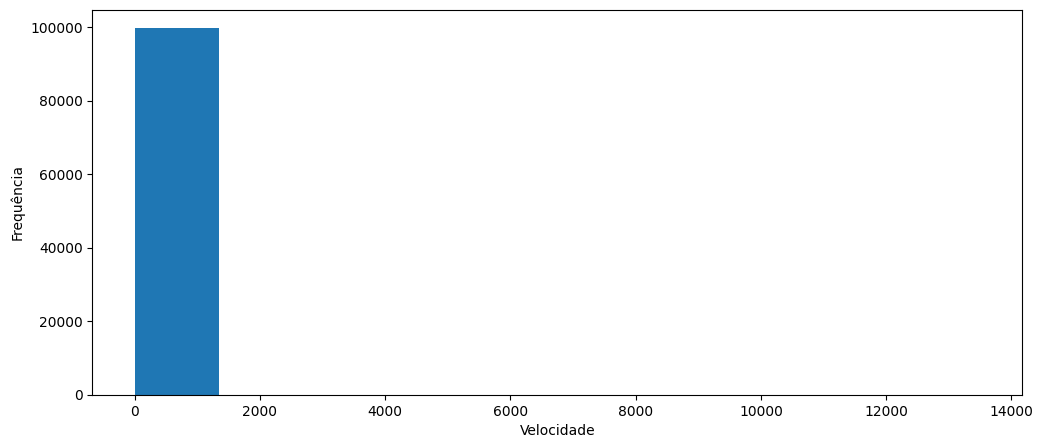

In [22]:
plt.figure(figsize=(12,5))
plt.hist(gdf_final["velocidade"])
plt.xlabel("Velocidade")
plt.ylabel("Frequência")
plt.show()

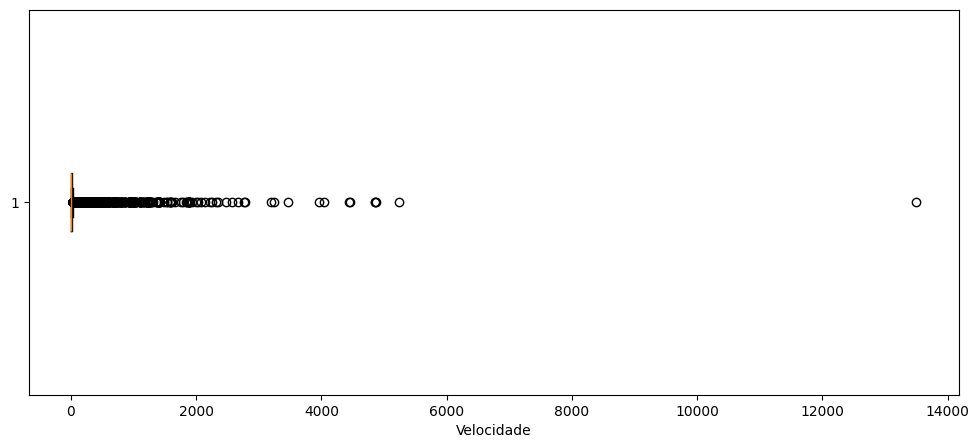

In [23]:
plt.figure(figsize=(12,5))
plt.boxplot(gdf_final["velocidade"], vert=False)
plt.xlabel("Velocidade")
plt.show()

In [24]:
gdf_final[(gdf_final['velocidade'] >= 0) & (gdf_final['velocidade'] <= 50)]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,id_2,duracao,velocidade
0,68853,5010-10,False,148.349719,"[332687.68579879985, 7383667.184539581]","[np.float64(332792.2284083655), np.float64(738...",2025-10-02 12:48:43-03:00,2025-10-02 12:49:30-03:00,Articulado (18m),0.80,3.281178,9.989606,5010-10_68853,47.0,11.362957
1,68853,5010-10,False,32.385046,"[332792.2284083655, 7383772.438907389]","[np.float64(332804.84353484295), np.float64(73...",2025-10-02 12:49:30-03:00,2025-10-02 12:50:12-03:00,Articulado (18m),0.80,0.716288,2.180751,5010-10_68853,42.0,2.775861
3,68853,5010-10,False,87.364702,"[332804.84353484295, 7383802.265905192]","[np.float64(332744.1297509116), np.float64(738...",2025-10-02 12:50:12-03:00,2025-10-02 12:51:22-03:00,Articulado (18m),0.80,1.932320,5.882984,5010-10_68853,70.0,4.493042
4,68853,5010-10,False,51.326566,"[332744.1297509116, 7383865.086503765]","[np.float64(332692.8276940262), np.float64(738...",2025-10-02 12:51:22-03:00,2025-10-02 12:51:41-03:00,Articulado (18m),0.80,1.135234,3.456240,5010-10_68853,19.0,9.725034
6,68853,5010-10,False,138.056573,"[332692.8276940262, 7383863.500523301]","[np.float64(332576.2268227334), np.float64(738...",2025-10-02 12:51:41-03:00,2025-10-02 12:52:28-03:00,Articulado (18m),0.80,3.053516,9.296484,5010-10_68853,47.0,10.574546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139712,31643,274P-10,False,167.989716,"[334571.0892961961, 7393150.561850594]","[np.float64(334492.10205995), np.float64(73932...",2025-10-02 12:55:15-03:00,2025-10-02 12:55:59-03:00,Biarticulado,0.90,6.359763,14.068608,274P-10_31643,44.0,13.744613
139715,48005,407G-10,False,252.540939,"[352769.53811401135, 7389163.07991912]","[np.float64(353021.55868181016), np.float64(73...",2025-10-02 12:55:35-03:00,2025-10-02 12:56:20-03:00,Articulado (23m),0.85,4.624159,13.149026,407G-10_48005,45.0,20.203275
139716,61310,6960-10,False,0.000000,"[325377.1291750581, 7382996.118304582]","[np.float64(325377.1291750581), np.float64(738...",2025-10-02 12:55:37-03:00,2025-10-02 12:56:21-03:00,Miniônibus,0.35,0.000000,0.000000,6960-10_61310,44.0,0.000000
139717,61322,5370-10,False,0.000000,"[325117.0786599126, 7370478.8199460115]","[np.float64(325117.0786599126), np.float64(737...",2025-10-02 12:55:29-03:00,2025-10-02 12:56:14-03:00,Miniônibus,0.35,0.000000,0.000000,5370-10_61322,45.0,0.000000


In [25]:
gdf_final[gdf_final['velocidade'] > 50]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,id_2,duracao,velocidade
53,68338,5010-10,False,643.216995,"[333649.73408162367, 7382168.18370829]","[np.float64(333134.763697461), np.float64(7382...",2025-10-02 12:54:22-03:00,2025-10-02 12:55:06-03:00,Articulado (23m),0.85,11.777645,33.490319,5010-10_68338,44.0,52.626845
199,36026,2705-10,False,8077.058519,"[349731.12775536045, 7395639.854880198]","[np.float64(357803.8240389044), np.float64(739...",2025-10-02 12:50:42-03:00,2025-10-02 12:51:03-03:00,Articulado (18m),0.80,178.647257,543.894753,2705-10_36026,21.0,1384.638603
202,36026,2705-10,False,7965.959255,"[357803.8240389044, 7395374.4325271165]","[np.float64(349844.95990354626), np.float64(73...",2025-10-02 12:51:48-03:00,2025-10-02 12:53:17-03:00,Articulado (18m),0.80,176.189979,536.413527,2705-10_36026,89.0,322.218577
308,21650,106A-10,False,11590.181448,"[334155.0755186474, 7399892.166814655]","[np.float64(327747.36604284943), np.float64(73...",2025-10-02 12:49:13-03:00,2025-10-02 12:49:58-03:00,Articulado (18m),0.80,256.350021,780.462202,106A-10_21650,45.0,927.214516
492,41597,4113-10,False,7262.859494,"[335449.0699033466, 7388873.589779219]","[np.float64(332190.39248021884), np.float64(73...",2025-10-02 12:50:11-03:00,2025-10-02 12:50:56-03:00,Básico,0.53,95.491690,208.679293,4113-10_41597,45.0,581.028759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139293,73858,737A-10,False,7249.797025,"[325694.34329366765, 7381887.3497468345]","[np.float64(319090.51501747797), np.float64(73...",2025-10-02 12:50:52-03:00,2025-10-02 12:53:05-03:00,Midiônibus,0.47,68.452090,316.438782,737A-10_73858,133.0,196.235107
139333,78903,7012-10,False,535.326056,"[319005.08522675926, 7376755.187470736]","[np.float64(318734.82609064213), np.float64(73...",2025-10-02 12:50:38-03:00,2025-10-02 12:51:06-03:00,Miniônibus,0.35,8.366496,9.657005,7012-10_78903,28.0,68.827636
139531,81270,8075-10,False,9094.583218,"[325506.3637583265, 7392034.962519405]","[np.float64(319177.203792554), np.float64(7385...",2025-10-02 12:54:27-03:00,2025-10-02 12:54:50-03:00,Padron,0.63,281.305369,291.007366,8075-10_81270,23.0,1423.499982
139545,11704,8055-51,False,15083.435865,"[329715.6575022099, 7397222.069771196]","[np.float64(321958.91319629294), np.float64(74...",2025-10-02 12:52:26-03:00,2025-10-02 12:53:10-03:00,Miniônibus,0.35,235.735785,272.097372,8055-51_11704,44.0,1234.099298


In [26]:
gdf_final[gdf_final['velocidade'] < 0]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,id_2,duracao,velocidade
